<IPython.core.display.Javascript object>


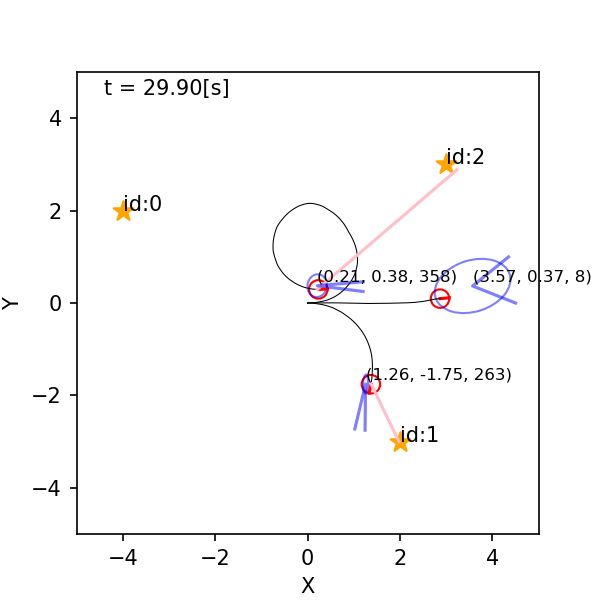

<IPython.core.display.Javascript object>


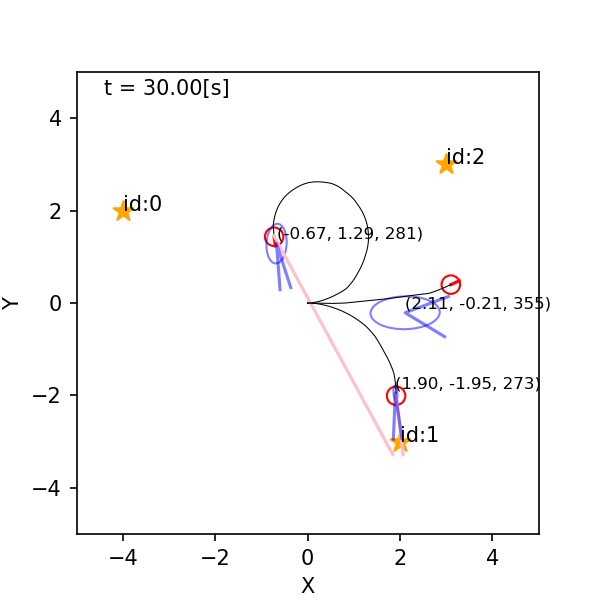

In [2]:
import numpy as np
import matplotlib
matplotlib.use('nbagg')
import matplotlib.animation as anm
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import copy
import math
import kal_python as kal

if __name__ == '__main__': 
    time_interval = 0.1
    world = kal.ir.World(30, time_interval, debug=False) 

    ### 地図を生成して3つランドマークを追加 ###
    m = kal.ir.Map()                                  
    m.append_landmark(kal.ir.Landmark(-4,2))
    m.append_landmark(kal.ir.Landmark(2,-3))
    m.append_landmark(kal.ir.Landmark(3,3))
    world.append(m)          

    ### ロボットを作る ###
    initial_pose = np.array([0, 0, 0]).T
    kf = kal.kf.KalmanFilter(m, initial_pose)
    circling = kal.mcl.EstimationAgent(time_interval, 0.2, 10.0/180*math.pi, kf)
    r = kal.rr.Robot(initial_pose, sensor=kal.rr.Camera(m), agent=circling, color="red")
    world.append(r)
    
    kf =kal.kf.KalmanFilter(m, initial_pose)
    linear = kal.mcl.EstimationAgent(time_interval, 0.1, 0.0, kf)
    r = kal.rr.Robot(initial_pose, sensor=kal.rr.Camera(m), agent=linear, color="red")
    world.append(r)
    
    kf = kal.kf.KalmanFilter(m, initial_pose)
    right = kal.mcl.EstimationAgent(time_interval, 0.1, -3.0/180*math.pi, kf)
    r = kal.rr.Robot(initial_pose, sensor=kal.rr.Camera(m), agent=right, color="red")
    world.append(r)

    world.draw()